In [95]:
import pandas as pd
from pytrends.request import TrendReq
import matplotlib.pyplot as plt

# 0.) Clean the Apple Data to get a quarterly series of EPS.

In [126]:
data = pd.read_csv("AAPL_quarterly_financials.csv")

In [127]:
data.index = data.name
data = pd.DataFrame(data.loc["BasicEPS",:]).iloc[2:,:]

In [128]:
data.index = pd.to_datetime(data.index)
# Assumption: Nulls are 0s
data = data.fillna(0.).sort_index()

# 3.) Come up with 6 search terms you think could nowcast earnings. (Different than the ones I used) Add in 3 terms that that you think will not Nowcast earnings. Pull in the gtrends data. Clean it to have a quarterly average.

In [116]:
# Create pytrends object
pytrends = TrendReq(hl='en-US', tz=360)

# Set up the keywords and the timeframe
keywords = ["iPhone", "Apple Layoffs", "MacBook", "iPad", "Apple CEO", "Apple Share Price", "Recession", "Chip Costs", "New iPhone Release Date",
            "iOS update", "Apple Watch", "Airpod Max", "Apple Student Discount", "Apple Pencil",
           "Harry Styles", "Blanket", "Paintings"]  # Add your keywords here
start_date = '2004-01-01'
end_date = '2024-01-01'

# Create an empty DataFrame to store the results
df = pd.DataFrame()

# Iterate through keywords and fetch data
for keyword in keywords:
    pytrends.build_payload([keyword], cat=0, timeframe=f'{start_date} {end_date}', geo='', gprop='')
    interest_over_time_df = pytrends.interest_over_time()
    df[keyword] = interest_over_time_df[keyword]

In [142]:
X = df.resample("Q").mean()
temp = pd.concat([data, X],axis=1).dropna()
data = temp[["BasicEPS"]].copy()
X = temp.iloc[:,1:].copy()

# 2.) Normalize all the X data

In [143]:
from sklearn.preprocessing import StandardScaler

In [144]:
scaler = StandardScaler()

In [145]:
X_scaled = scaler.fit_transform(X)

# 4.) Run a Lasso with lambda of .5. Plot a bar chart.

In [146]:
from sklearn.linear_model import Lasso

In [147]:
lasso = Lasso(alpha = 0.1)

In [148]:
lasso.fit(X_scaled, data)

Lasso(alpha=0.1)

In [149]:
coefficients = lasso.coef_

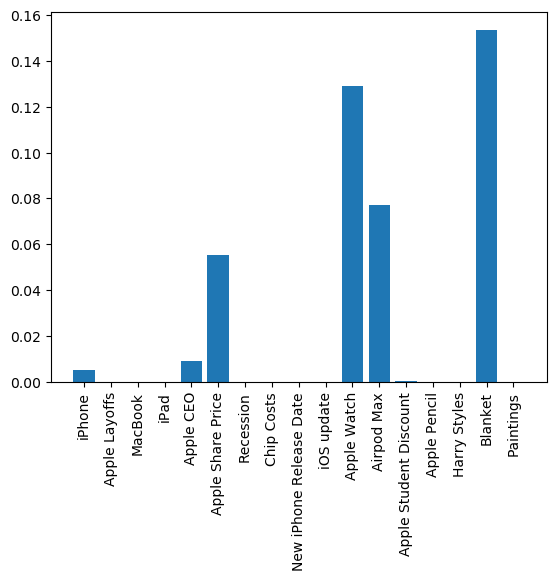

In [150]:
plt.bar(range(len(coefficients)), coefficients, tick_label=X.columns)
plt.xticks(rotation=90)
plt.show()

# 5.) Do these coefficient magnitudes make sense?

These coefficients don't make the most sense. Firstly, some of the keywords which you would expect to be relevant, such as release date, MacBook, iPad, chip costs, and more, seem to have no relevance with a coefficient of 0. However, "Blanket", which would not be expected to be very relevant has the largest coefficient value. I think it makes sense for "Apple Watch" and "Airpod Max" to have higher coefficients than "Apple CEO", as these are popular devices that are likely bought every day, however I don't believe the magnitude of "iPhone" makes much sense, as this is objectively one of the most popular Apple products. Overall, I believe these coefficient magnitudes don't make much sense in a practical way, as the keywords you would think are most relevant are not, and what I thought would be irrelevant has a high coefficient value.